In [1]:
import numpy as np
import cv2
import matplotlib.image as im
import numpy
import matplotlib.pyplot as plt
import os

In [2]:

folder2 = r"datasets\classes"
file_names = os.listdir(folder2)
file_names

['subject01.gif.jpg',
 'subject01.glasses.jpg',
 'subject01.happy.jpg',
 'subject01.leftlight.jpg',
 'subject01.noglasses.jpg',
 'subject01.normal.jpg',
 'subject01.rightlight.jpg',
 'subject01.sad.jpg',
 'subject01.sleepy.jpg',
 'subject01.surprised.jpg',
 'subject01.wink.jpg',
 'subject02.centerlight.jpg',
 'subject02.glasses.jpg',
 'subject02.happy.jpg',
 'subject02.leftlight.jpg',
 'subject02.noglasses.jpg',
 'subject02.normal.jpg',
 'subject02.rightlight.jpg',
 'subject02.sad.jpg',
 'subject02.sleepy.jpg',
 'subject02.surprised.jpg',
 'subject02.wink.jpg',
 'subject03.centerlight.jpg',
 'subject03.glasses.jpg',
 'subject03.happy.jpg',
 'subject03.leftlight.jpg',
 'subject03.noglasses.jpg',
 'subject03.normal.jpg',
 'subject03.rightlight.jpg',
 'subject03.sad.jpg',
 'subject03.sleepy.jpg',
 'subject03.surprised.jpg',
 'subject03.wink.jpg']

In [3]:
len(file_names)

33

In [4]:
# load all the images and store them into an array
fd = cv2.CascadeClassifier(r"haarcascade_frontalface_alt.xml")
def load_image(imgname):
    img = im.imread(folder2+'\\'+imgname) # load the image
    corners = fd.detectMultiScale(img,1.3,4) # get the face corners
    (x,y,w,h) = corners[0] # get the face corners
    img = img[y-20:y+h+20,x-20:x+w+20]  # cropping the face area from the image
    img = cv2.resize(img,(100,100)) # resizing every image to 100x100
    return img

In [5]:
trainimg = []
trainlb = []
for imgname in file_names:
    img = load_image(imgname)
    trainimg.append(img)
    trainlb.append(imgname[:9])

In [6]:
trainlb

['subject01',
 'subject01',
 'subject01',
 'subject01',
 'subject01',
 'subject01',
 'subject01',
 'subject01',
 'subject01',
 'subject01',
 'subject01',
 'subject02',
 'subject02',
 'subject02',
 'subject02',
 'subject02',
 'subject02',
 'subject02',
 'subject02',
 'subject02',
 'subject02',
 'subject02',
 'subject03',
 'subject03',
 'subject03',
 'subject03',
 'subject03',
 'subject03',
 'subject03',
 'subject03',
 'subject03',
 'subject03',
 'subject03']

In [7]:
trainimg = numpy.array(trainimg)
trainimg.shape

(33, 100, 100)

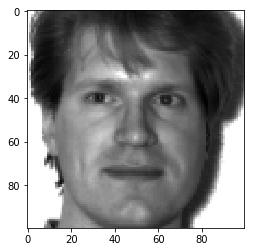

In [8]:
plt.imshow(trainimg[0],cmap='gray')

In [9]:
trainimg = trainimg.reshape(33,1,100,100)
#scale the images
trainimg = trainimg/255

In [10]:
# onehot encoding of labels
trainlb = numpy.array(trainlb).reshape(33,1)
from sklearn.preprocessing import OneHotEncoder
trainlb = OneHotEncoder().fit_transform(trainlb).toarray()
print(trainimg.shape)
print(trainlb.shape)

(33, 1, 100, 100)
(33, 3)


In [11]:
from keras import models,layers
from keras import backend
backend.set_image_data_format("channels_first")

Using TensorFlow backend.


In [12]:
model = models.Sequential()

In [13]:
# first convolutional layer
model.add(layers.Conv2D(filters=20,kernel_size=(5,5),activation='relu',
                       input_shape=(1,100,100)))
# maxpooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))

Instructions for updating:
Colocations handled automatically by placer.


In [14]:
# second convolutional layer
model.add(layers.Conv2D(filters=40,kernel_size=(5,5),activation='relu'))
# maxpooling layer
model.add(layers.MaxPooling2D(pool_size=(2,2)))

In [15]:
# add a flatten layer
model.add(layers.Flatten())
# hidden layer
model.add(layers.Dense(80,activation='relu'))
#add the output layer
model.add(layers.Dense(3,activation='sigmoid'))

In [16]:
#compile the model
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],
             optimizer='adam')
# train the model
model.fit(trainimg,trainlb,batch_size=None,epochs=10,verbose=True)

Instructions for updating:
Use tf.cast instead.
Epoch 1/10
33/33 [==============================] - 2s 49ms/step - loss: 1.0984 - acc: 0.3333
Epoch 2/10
33/33 [==============================] - 1s 26ms/step - loss: 1.0827 - acc: 0.3939
Epoch 3/10
33/33 [==============================] - 1s 25ms/step - loss: 1.0775 - acc: 0.6364
Epoch 4/10
33/33 [==============================] - 1s 26ms/step - loss: 1.0332 - acc: 0.6667
Epoch 5/10
33/33 [==============================] - 1s 29ms/step - loss: 0.9072 - acc: 0.3333
Epoch 6/10
33/33 [==============================] - 1s 30ms/step - loss: 1.1028 - acc: 0.6667
Epoch 7/10
33/33 [==============================] - 1s 26ms/step - loss: 0.6721 - acc: 0.6061
Epoch 8/10
33/33 [==============================] - 1s 25ms/step - loss: 0.8202 - acc: 0.6970
Epoch 9/10
33/33 [==============================] - 1s 26ms/step - loss: 0.7163 - acc: 0.5758
Epoch 10/10
33/33 [==============================] - 1s 27ms/step - loss: 0.4318 - acc: 0.9091


In [17]:
# testing
labels = ['subject01','subject02',"subject03"]
def load_image2(img):
    corners = fd.detectMultiScale(img,1.3,4) # get the face corners
    if len(corners)==0:
        return None,None
    else:
        (x,y,w,h) = corners[0] # get the face corners
        img2 = img[y-20:y+h+20,x-20:x+w+20]  # cropping the face area from the image
        img2 = cv2.resize(img2,(100,100)) # resizing every image to 100x100
        output = model.predict_classes(img2.reshape(1,1,100,100))
        output = labels[output[0]]
        return output, corners
        

('subject03', array([[ 90,  86, 135, 135]], dtype=int32))


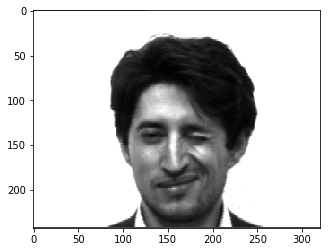

In [24]:
path = "datasets\classes\subject03.wink.jpg"
img = im.imread(path)
output = load_image2(img)
print(output)
plt.imshow(img,cmap='gray')
plt.show()


In [19]:
fd = cv2.CascadeClassifier(r"haarcascade_frontalface_alt.xml")
def get_face(img):
    corners = fd.detectMultiScale(img,1.3,4)
    if len(corners)==0:
        return None,None
    else:
        (x,y,w,h) = corners[0]
        img = img[x:x+h,y:y+w] # cropping the image
        img = cv2.resize(img,(100,100))
        return (x,y,w,h),img

In [23]:
vid = cv2.VideoCapture(0)
while True:
    ret,img = vid.read()
    img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    corner,img2 = get_face(img2)
    if corner!=None:
        (x,y,w,h)=corner
        output = model.predict_classes(img2.reshape(1,1,100,100))
        person = labels[output[0]]
        cv2.putText(img,person,(x,y),cv2.FONT_HERSHEY_COMPLEX,
                    1.0,(0,0,255),2)
        cv2.rectangle(img,(x,y),(x+w,y+h),(0,255,255),3)
    cv2.imshow("img",img)
    if cv2.waitKey(1) & 0xFF==ord('q'):
        break
vid.release()
cv2.destroyAllWindows()